#Feature Extraction
##Project 2 - Section 2

###List of Tasks

Load the cats & dogs dataset, and afterwards generate the train and validation dataset. Load and freeze the base model. Add a fully-connected classifier on top of the base model. Compile, train, and evaluate the model

Please choose two from the following pre-trained (base) models:
*   InceptionV3
*   VGG16
*   ResNet50

Compare their performance on the binary classification task of cats and dogs. Please note that you could also customise the classifier (add or remove layers) or select extra hyperparameters that you learnt in Section 1 in order to increase its performance.



##Prepare

Load the libraries required

In [2]:
import tensorflow as tf
import os

##Load the cats & dogs dataset



In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_file = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(zip_file), 'cats_and_dogs_filtered')

68606236/68606236 [==============================] - 0s 0us/step


##Generate the train and validation datasets

Create directories for the training and validation data sets:

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

Resize Images and define the batch size:



In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

Create the training dataset:

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                             validation_split=0.3,
                                             subset="training",
                                             seed = 123,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 2000 files belonging to 2 classes.
Using 1400 files for training.


Create the validation dataset:

In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                             validation_split=0.3,
                                             subset="validation",
                                             seed = 123,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 1000 files belonging to 2 classes.
Using 300 files for validation.


Check the namees of the classes in the training dataset

In [8]:
class_names = train_dataset.class_names
print(class_names)

['cats', 'dogs']


Check some images:

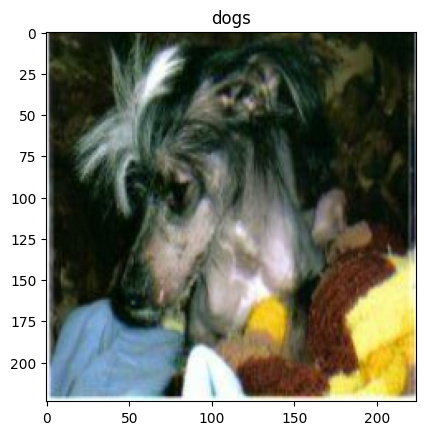

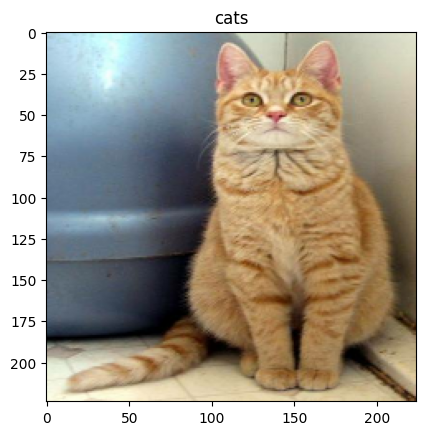

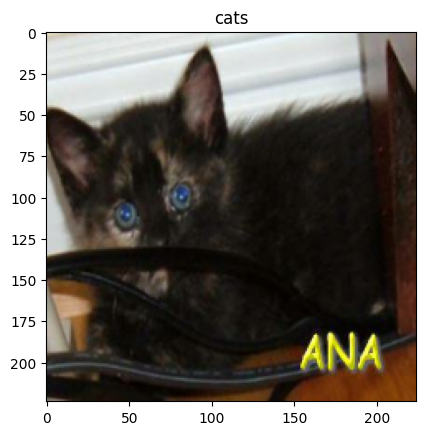

In [9]:
import matplotlib.pyplot as plt


for image, label in train_dataset.take(3):
    image = image.numpy().astype("uint8")
    plt.imshow(image[0])
    plt.title(class_names[label[0]])

    plt.show()

**Why are these the same 3 images?**

## Load and freeze InceptionV3 as the base model.


Load the convolutional base of the InceptionV3 model (without th e fully connected layers at the end of that model):

In [19]:
incV3_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

87910968/87910968 [==============================] - 0s 0us/step


Freeze the convolutional base

In [20]:
incV3_model.trainable = False

##Add a fully-connected classifier on top of the base model.



The model consists of the following layers:
*   Global Average Pooling Layer
*   An binary Output Layer



In [21]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, Rescaling

inputs = tf.keras.Input(shape = (224, 224, 3))

x = Rescaling(scale = 1./127.5, offset = -1)(inputs)
x = incV3_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation ='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

Display characteristics of the model and the number of trainable parameters

In [22]:
model.summary(show_trainable=True)

Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         Y          
                                                                            
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         Y          
                                                                            
 inception_v3 (Functional)   (None, 5, 5, 2048)        2180278   N          
                                                       4                    
                                                                            
 global_average_pooling2d_1  (None, 2048)              0         Y          
  (GlobalAveragePooling2D)                                                  
                                                                            
 dense_1 (Dense)             (None, 1)                 2049

##Compile, train, and evaluate the model

Compile the model



In [25]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
              metrics=['accuracy'])

Insert an early stopping function

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

Train the model

In [27]:
history = model.fit(train_dataset,
                    epochs = 10,
                    validation_data=validation_dataset)

Epoch 1/10
44/44 [==============================] - 135s 3s/step - loss: 0.1746 - accuracy: 0.9393 - val_loss: 0.0699 - val_accuracy: 0.9800
Epoch 2/10
44/44 [==============================] - 129s 3s/step - loss: 0.0545 - accuracy: 0.9893 - val_loss: 0.0488 - val_accuracy: 0.9867
Epoch 3/10
44/44 [==============================] - 123s 3s/step - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0438 - val_accuracy: 0.9900
Epoch 4/10
44/44 [==============================] - 142s 3s/step - loss: 0.0267 - accuracy: 0.9943 - val_loss: 0.0407 - val_accuracy: 0.9900
Epoch 5/10
44/44 [==============================] - 124s 3s/step - loss: 0.0200 - accuracy: 0.9964 - val_loss: 0.0437 - val_accuracy: 0.9833
Epoch 6/10
44/44 [==============================] - 125s 3s/step - loss: 0.0173 - accuracy: 0.9986 - val_loss: 0.0389 - val_accuracy: 0.9900
Epoch 7/10
44/44 [==============================] - 123s 3s/step - loss: 0.0147 - accuracy: 0.9993 - val_loss: 0.0372 - val_accuracy: 0.9867
Epoch 8/10
44

evaluate the model on the validation set

In [28]:
model_evaluation = model.evaluate(validation_dataset)

10/10 [==============================] - 23s 2s/step - loss: 0.0368 - accuracy: 0.9867


evaluate the model on the training dataset

In [29]:
model_evaluation = model.evaluate(train_dataset)

44/44 [==============================] - 104s 2s/step - loss: 0.0080 - accuracy: 1.0000


plot the validation loss and the traing loss

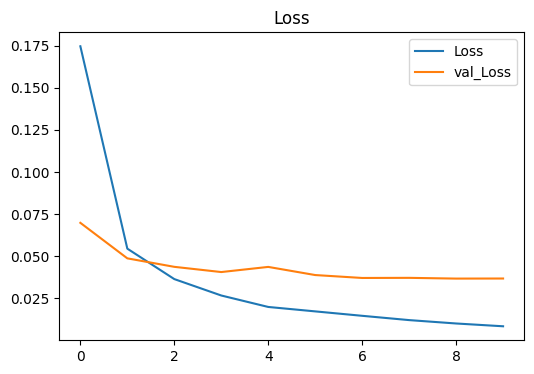

In [30]:
plt.figure(figsize=(6, 4))


plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()

## Load and freeze ResNet50 as the base model.


Load the convolutional base of the ResNet50 model (without th e fully connected layers at the end of that model):

In [31]:
rn50_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


Freeze the convolutional base

In [32]:
rn50_model.trainable = False

##Add a fully-connected classifier on top of the base model.



The model consists of the following layers:
*   Global Average Pooling Layer
*   An binary Output Layer



In [33]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, Rescaling

inputs = tf.keras.Input(shape = (224, 224, 3))

x = Rescaling(scale = 1./127.5, offset = -1)(inputs)
x = rn50_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation ='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

Display characteristics of the model and the number of trainable parameters

In [34]:
model.summary(show_trainable=True)

Model: "model_2"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         Y          
                                                                            
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         Y          
                                                                            
 resnet50 (Functional)       (None, 7, 7, 2048)        2358771   N          
                                                       2                    
                                                                            
 global_average_pooling2d_2  (None, 2048)              0         Y          
  (GlobalAveragePooling2D)                                                  
                                                                            
 dense_2 (Dense)             (None, 1)                 2049

##Compile, train, and evaluate the model

Compile the model and train the model

In [35]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
              metrics=['accuracy'])
history = model.fit(train_dataset,
                    epochs = 10,
                    validation_data=validation_dataset)

Epoch 1/10
44/44 [==============================] - 215s 5s/step - loss: 0.6832 - accuracy: 0.5514 - val_loss: 0.6570 - val_accuracy: 0.6200
Epoch 2/10
44/44 [==============================] - 210s 5s/step - loss: 0.6512 - accuracy: 0.6257 - val_loss: 0.6396 - val_accuracy: 0.6300
Epoch 3/10
44/44 [==============================] - 209s 5s/step - loss: 0.6410 - accuracy: 0.6393 - val_loss: 0.6315 - val_accuracy: 0.6400
Epoch 4/10
44/44 [==============================] - 212s 5s/step - loss: 0.6372 - accuracy: 0.6414 - val_loss: 0.6379 - val_accuracy: 0.6367
Epoch 5/10
44/44 [==============================] - 205s 5s/step - loss: 0.6325 - accuracy: 0.6357 - val_loss: 0.6223 - val_accuracy: 0.6433
Epoch 6/10
44/44 [==============================] - 210s 5s/step - loss: 0.6222 - accuracy: 0.6614 - val_loss: 0.6193 - val_accuracy: 0.6600
Epoch 7/10
44/44 [==============================] - 208s 5s/step - loss: 0.6256 - accuracy: 0.6457 - val_loss: 0.6340 - val_accuracy: 0.6167
Epoch 8/10
44

evaluate the model on the validation set

In [36]:
model_evaluation = model.evaluate(validation_dataset)

10/10 [==============================] - 37s 4s/step - loss: 0.6130 - accuracy: 0.6600


evaluate the model on the training dataset

In [37]:
model_evaluation = model.evaluate(train_dataset)

44/44 [==============================] - 169s 4s/step - loss: 0.6031 - accuracy: 0.6764


plot the validation loss and the traing loss

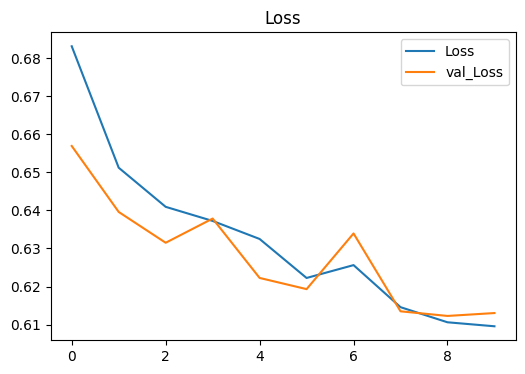

In [38]:
plt.figure(figsize=(6, 4))


plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()